In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
#load data
start=pd.read_csv('50_Startups.csv')
start.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
start.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [5]:
start.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


In [6]:
start.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [7]:
d1=start.columns

#EDA(Exploratory data Analysis)

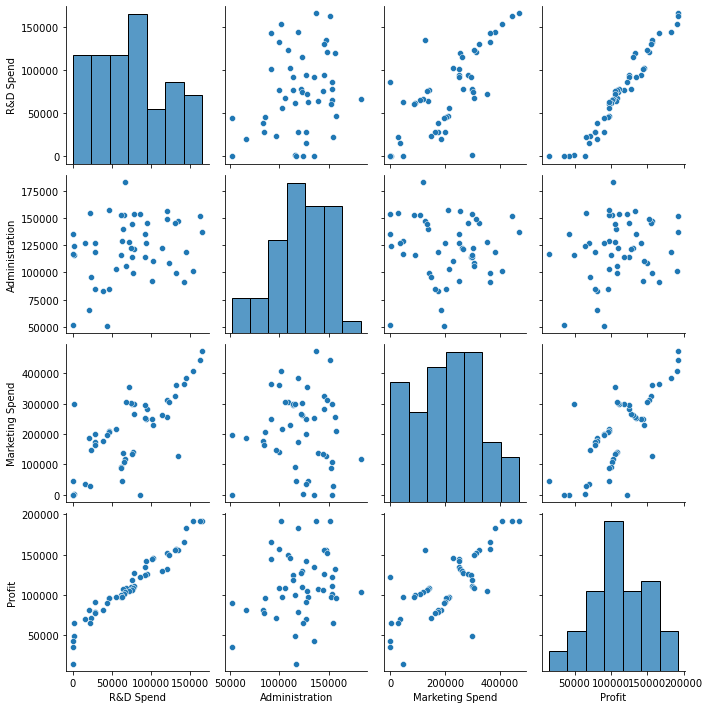

In [8]:
sns.pairplot(start)

<AxesSubplot:xlabel='Profit', ylabel='Density'>

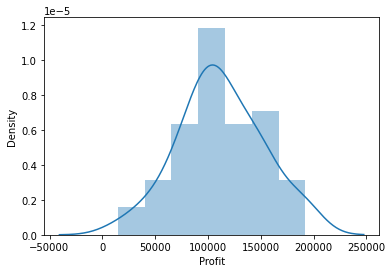

In [9]:
sns.distplot(start['Profit'])

<AxesSubplot:>

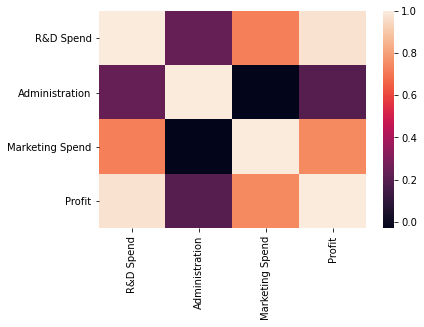

In [10]:
sns.heatmap(start.corr())

A.Traning a linear regression model

In [11]:
X=start[['R&D Spend','Administration','Marketing Spend']]
Y=start['Profit']

B.Train Test Split

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.4,random_state=101)

C.Creating and Training model

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
Xm=LinearRegression()
Xm.fit(X_train,Y_train)

LinearRegression()

Model Evalution:(Intercept and Coefficient)

In [16]:
print(Xm.intercept_)

44203.26946443954


In [17]:
coef=pd.DataFrame(Xm.coef_,X.columns, columns=['Coefficient'])

In [18]:
coef

,Coefficient
R&D Spend,0.813614
Administration,0.013227
Marketing Spend,0.034079


D.prediction from our model

In [19]:
predictions=Xm.predict(X_test)

Data visualization:

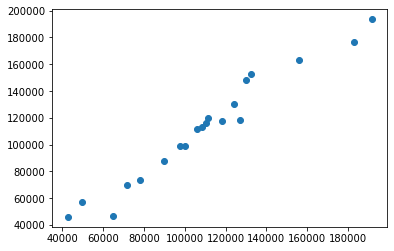

In [20]:
plt.scatter(Y_test,predictions)

#Residual histogram:

<AxesSubplot:xlabel='Profit', ylabel='Density'>

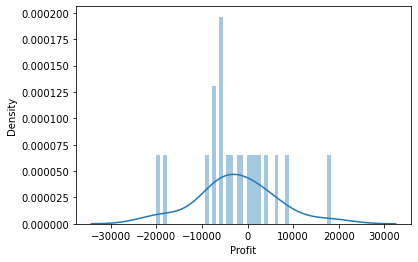

In [21]:
sns.distplot((Y_test-predictions),bins=50)

In [22]:
from sklearn import metrics

In [23]:
print('MAE:',metrics.mean_absolute_error(Y_test,predictions))
print('MSE:',metrics.mean_squared_error(Y_test,predictions))
print('RMSE:',np.sqrt(metrics.mean_squared_error(Y_test,predictions)))

MAE: 6733.384421932418
MSE: 77138060.17464086
RMSE: 8782.827572862903
